In [1]:
import numpy as np

img = np.load("/home/ponoma/workspace/DATA/mirflickr_dataset/diffuser_images_npy/im2.npy")
img.shape

(270, 480, 3)

In [14]:
# calculating max and min tensor values of the mirflickr dataset
from dataset import Mirflickr
import torch
from tqdm import tqdm
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '0,1,2'
gpu_number = 0

dataset = Mirflickr("/home/ponoma/workspace/DATA/mirflickr_dataset/")

trainLoader = torch.utils.data.DataLoader(dataset, batch_size=32)

# from https://stackoverflow.com/questions/66678052/how-to-calculate-the-mean-and-the-std-of-cifar10-data 
def get_max_min(trainLoader):
    final_in_max = float('-inf')
    final_in_min = float('inf')
    final_target_max = float('-inf')
    final_target_min = float('inf')
    for _, batch in enumerate(tqdm(trainLoader)):
        input, target = batch
        input, target = input.to("cuda"), target.to("cuda")  
        final_in_min = min(final_in_min, input.min())
        final_in_max = max(final_in_max, input.max())
        final_target_min = min(final_target_min, target.min())
        final_target_max = max(final_target_max, target.max())

    # Calculate min and max value of input image
    print("Image Max", final_in_max)
    print("Image Min", final_in_min)

    # Calculate min and max value of target images
    print("Target Max", final_target_max)
    print("Target Min", final_target_min)


get_max_min(trainLoader)

100%|██████████| 782/782 [08:26<00:00,  1.54it/s]

Image Max tensor(0.9004, device='cuda:0')
Image Min tensor(-0.0079, device='cuda:0')
Target Max tensor(1., device='cuda:0')
Target Min tensor(4.1243e-05, device='cuda:0')


In [ ]:
# Result from above code for Mirflickr dataset

# Image Max tensor(0.9004, device='cuda:0')
# Image Min tensor(-0.0079, device='cuda:0')
# Target Max tensor(1., device='cuda:0')
# Target Min tensor(4.1243e-05, device='cuda:0')

# Total number of parameters in ConvNext model (Lensless Imaging Transformer Decoder):
# 36008928 = 36 million

# Total number of parameters in Lensless Imaging Transformer:
# 16.7 million

In [3]:
# calculating mean and sd of the mirflickr dataset
import torch
from tqdm import tqdm
import os
from dataset import get_loader

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '0,1,2'
gpu_number = 0

dataset = "Mirflickr"

train_loader, _, _ = get_loader(dataset, batch_size=32, num_workers=4)

# from https://stackoverflow.com/questions/66678052/how-to-calculate-the-mean-and-the-std-of-cifar10-data 
def get_mean_std(train_loader):
    imgs = None
    labels = None
    for step, batch in enumerate(tqdm(train_loader)):
        image_batch = batch[0]
        label_batch = batch[1]
        # stack all images and labels into a single tensor
        if imgs is None:
            imgs = image_batch.cpu()
            labels = label_batch.cpu()
        else:
            imgs = torch.cat([imgs, image_batch.cpu()], dim=0)
            labels = torch.cat([labels, label_batch.cpu()], dim=0)      
    imgs = imgs.numpy()
    labels = labels.numpy()
    
    # calculate input image mean over each channel (r,g,b)
    mean_r = imgs[:,0,:,:].mean()
    mean_g = imgs[:,1,:,:].mean()
    mean_b = imgs[:,2,:,:].mean()
    print("Image Mean (RGB order)")
    print(mean_r, mean_g, mean_b, "\n")

    # calculate std over each channel (r,g,b)
    std_r = imgs[:,0,:,:].std()
    std_g = imgs[:,1,:,:].std()
    std_b = imgs[:,2,:,:].std()
    print("Image SD")
    print(std_r, std_g, std_b, "\n")

    # calculate ground truth mean and sd
    gt_mean_r = labels[:,0,:,:].mean()
    gt_mean_g = labels[:,1,:,:].mean()
    gt_mean_b = labels[:,2,:,:].mean()
    print("Ground truth Mean (RGB order)")
    print(gt_mean_r, gt_mean_g, gt_mean_b, "\n")

    gt_std_r = labels[:,0,:,:].std()
    gt_std_g = labels[:,1,:,:].std()
    gt_std_b = labels[:,2,:,:].std()
    print("Ground truth SD")
    print(gt_std_r, gt_std_g, gt_std_b, "\n")


get_mean_std(train_loader)

  0%|          | 0/782 [00:11<?, ?it/s]


KeyboardInterrupt: 

In [4]:
from PIL import Image
import numpy as np

# preprocess and save selected image
img_number = 1779
array = np.load(f"/home/ponoma/workspace/DATA/mirflickr_dataset/ground_truth_lensed_npy/im{img_number}.npy")
array = np.flipud(np.clip(array/np.max(array), 0,1))
array = (array * 255).astype(np.uint8)
cropped_img = array[60:,62:-38,:]
img = Image.fromarray(cropped_img)
img.save(f"/home/ponoma/workspace/Basic_Transformer/original_images/im{img_number}_processed.jpeg")

(210, 380, 3)


(-0.5, 379.5, 209.5, -0.5)

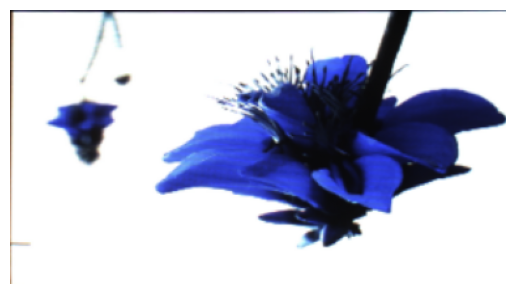

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Testing cropping
img_number = 5326
array = np.load(f"/home/ponoma/workspace/DATA/mirflickr_dataset/ground_truth_lensed_npy/im{img_number}.npy")
array = (array * 255).astype(np.uint8)
array = np.flipud(np.clip(array/np.max(array), 0,1))
cropped_img = array[60:,62:-38,:]

print(cropped_img.shape)
plt.imshow(cropped_img)
plt.axis('off')